# Exploratory Data Analysis - True weather observations vs Solar Energy Production

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

### Read data

In [2]:
train = pd.read_parquet('../data/data/A/X_train_observed.parquet', engine="fastparquet")
target = pd.read_parquet('../data/data/A/train_targets.parquet', engine="fastparquet")

train = train.set_index("date_forecast")
train.head()


,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,...,342.834015,-3.202,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,...,346.294006,-3.650,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,...,349.768005,-3.998,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,...,353.251007,-4.247,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,...,356.742004,-4.393,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0


In [3]:
target = target.set_index("time")
target.head()

,pv_measurement
time,
2019-06-02 22:00:00,0.00
2019-06-02 23:00:00,0.00
2019-06-03 00:00:00,0.00
2019-06-03 01:00:00,0.00
2019-06-03 02:00:00,19.36


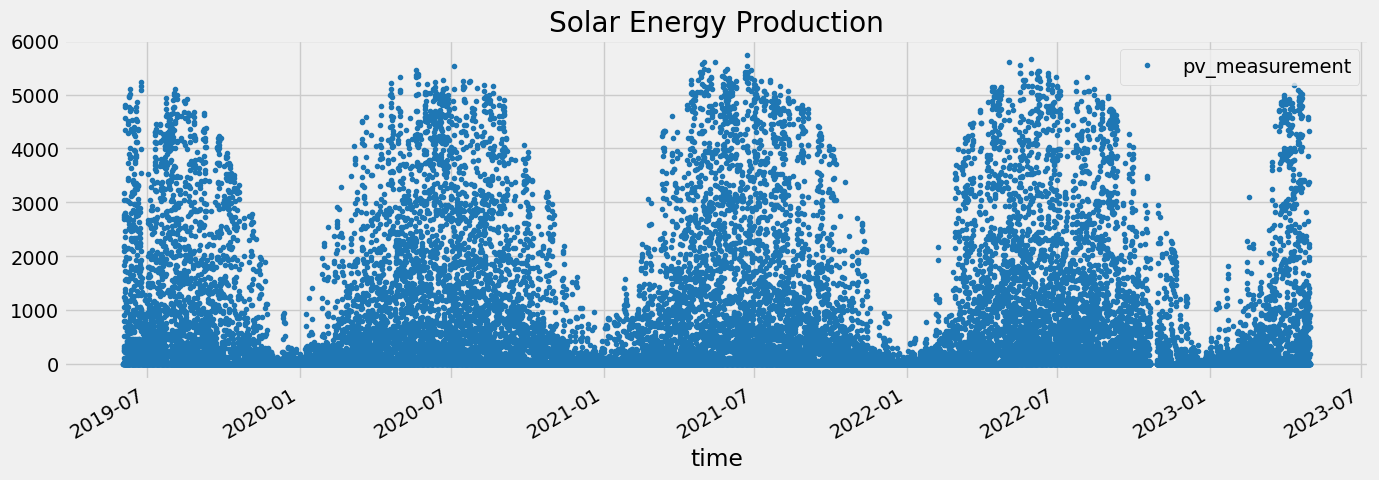

In [4]:
target.plot(style='.', figsize=(15,5), color=color_pal[0], title='Solar Energy Production')
plt.show()

We can observe that the target has a yearly cycle, with low production in winter, and high in summer. This is expected. The time of year seems to matter a lot, but not neccessarily the year itself. Therefore, adding features for month and day of the month could be a good idea. However, it is possible that other features, that also vary throughout the year, such as temperature, captures this, and that the dates would be redundant.

In [5]:
#Takes in a dataframe - assumes that the index is a datetime
#Returns a dataframe with new features for year, month, day of month, hour and minute
def split_time_index(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df

train = split_time_index(train)
train.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,hour,day,quarter,month,year
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,...,39640.101562,3.7,-3.6,-0.8,-0.0,22,2,2,6,2019
2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,...,40123.898438,3.6,-3.6,-0.6,-0.0,22,2,2,6,2019
2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,...,40628.300781,3.6,-3.6,-0.4,-0.0,22,2,2,6,2019
2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,...,41153.601562,3.5,-3.5,-0.2,-0.0,22,2,2,6,2019
2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,...,41699.898438,3.5,-3.5,0.0,-0.0,23,2,2,6,2019


### Data preparation

Invistigate is NA-values are present

In [6]:
train.isna().sum()

absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m               22247
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
cloud_base_agl:m                    8066
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                         0
precip_type_5min:idx                   0
pressure_100m:hP

In [7]:
#Replace them with 0
train = train.fillna(0)
train.isna().sum()


absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
dew_or_rime:idx                   0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
elevation:m                       0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
precip_type_5min:idx              0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                       0
rain_water:kgm2             

Investigate duplicates and potentially remove duplicates - shouldnt exist since each datetime should be unique

In [8]:
train.loc[train.duplicated()]

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,hour,day,quarter,month,year
date_forecast,,,,,,,,,,,,,,,,,,,,,


### Feature understanding

In [9]:
#Combine the rows in train so that we only have 1 per hor - new value is the average
train = train.resample('60T').mean()

#new df containing both features and target - making plotting the relationship easier 
combo = train.copy()
combo["pv_measurement"] = target["pv_measurement"]
combo.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,hour,day,quarter,month,year,pv_measurement
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.700,1.22825,1728.949951,0.000000,0.00,1728.949951,0.0,280.299988,0.000,0.000000,...,3.600,-3.575,-0.500,0.0,22.0,2.0,2.0,6.0,2019.0,0.00
2019-06-02 23:00:00,7.700,1.22350,1689.824951,0.000000,0.00,1689.824951,0.0,280.299988,0.000,0.000000,...,3.350,-3.350,0.275,0.0,23.0,2.0,2.0,6.0,2019.0,0.00
2019-06-03 00:00:00,7.875,1.21975,1563.224976,0.000000,0.00,1563.224976,0.0,280.649994,0.000,0.000000,...,3.050,-2.950,0.750,0.0,0.0,3.0,2.0,6.0,2019.0,0.00
2019-06-03 01:00:00,8.425,1.21800,1283.425049,208.649994,0.75,1283.425049,0.0,281.674988,0.300,526.775024,...,2.725,-2.600,0.875,0.0,1.0,3.0,2.0,6.0,2019.0,0.00
2019-06-03 02:00:00,8.950,1.21800,1003.500000,32468.150391,23.10,1003.500000,0.0,282.500000,11.975,22068.949219,...,2.550,-2.350,0.925,0.0,2.0,3.0,2.0,6.0,2019.0,19.36


##### Plots

In [24]:
data_columns = ['sun_azimuth:d','sun_elevation:d','super_cooled_liquid_water:kgm2','t_1000hPa:K','total_cloud_cover:p']
total_columns = data_columns.copy()
total_columns.append('pv_measurement')

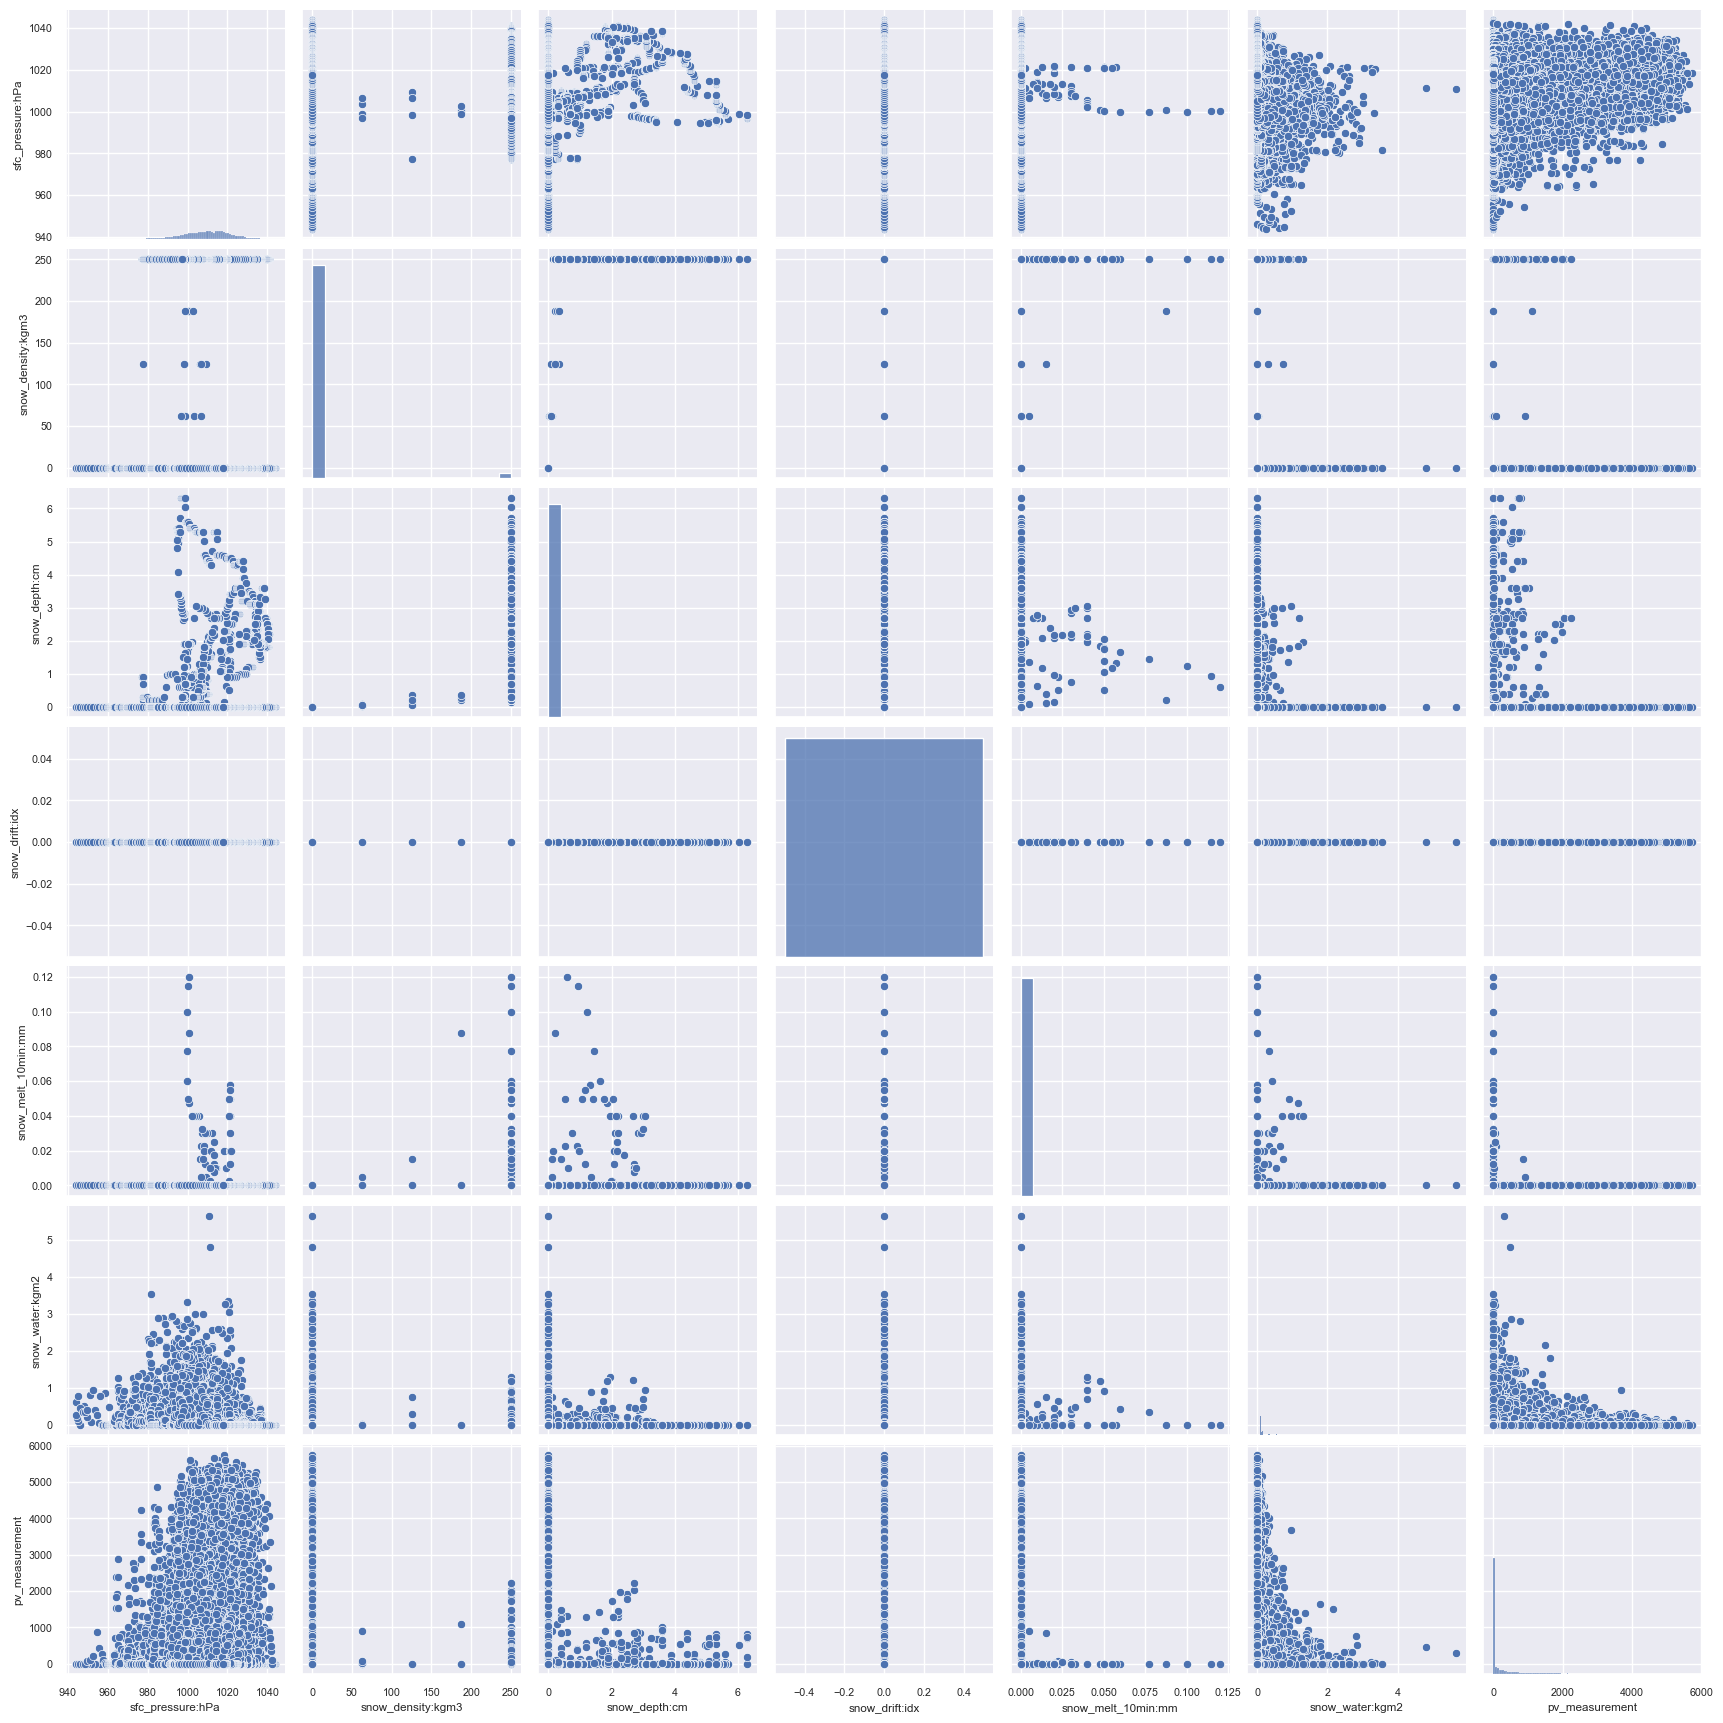

In [25]:
sns.set(font_scale=0.7)
sns.pairplot(data = combo, vars=total_columns)
plt.show()

##### Correlation

<Axes: >

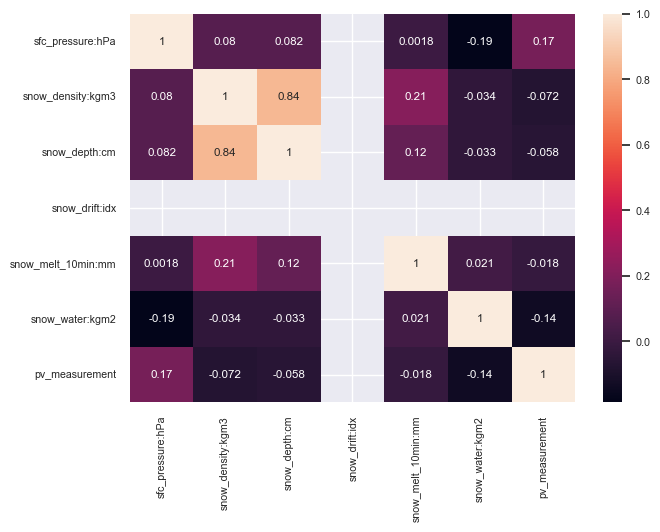

In [26]:
#Show correlation
corr = combo[total_columns].dropna().corr()
sns.heatmap(corr, annot=True)